<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/R_Image_Processing_edits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data
# #Training
# # #Labels
# # #Images
# #Validation
# # #Labels
# # #Images

Install Packages

In [1]:
install.packages(c('raster','sf','fasterize'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘sp’, ‘Rcpp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘wk’, ‘RcppArmadillo’




In [2]:
install.packages("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("devtools")
devtools:::install_github("gearslaboratory/gdalUtils")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.26.0) [CRAN]
iterators   (NA -> 1.0.14) [CRAN]
R.utils     (NA -> 2.12.3) [CRAN]
foreach     (NA -> 1.5.2 ) [CRAN]


Skipping 1 packages not available: rgdal

Installing 6 packages: R.methodsS3, R.oo, iterators, rgdal, R.utils, foreach

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp29irxZ/remotes14f21becdc25/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/Rtmp29irxZ/file14f26bcd60ab/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”


Load Libraries

In [4]:
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
# library(gdalUtils)

Loading required package: sp

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE


Attaching package: ‘fasterize’


The following object is masked from ‘package:graphics’:

    plot


The following object is masked from ‘package:base’:

    plot



Attaching package: ‘magrittr’


The following object is masked from ‘package:raster’:

    extract



Attaching package: ‘data.table’


The following object is masked from ‘package:raster’:

    shift




Connect to Google Drive

In [5]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=0fd55b3549ec956df6eed595afeb1e49&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbHFVVktHU1JhMEVEeDdvMzMzblM4U2VWSGxqRFJjSi1aVjBtSzlUSGZJZEtWb01obFNEX2V3TXdySkJSMmlwZyIsInN0YXRlIjoiMGZkNTViMzU0OWVjOTU2ZGY2ZWVkNTk1YWZlYjFlNDkifQ==


**input_data folder set up**


*   naip_index.zip
     *   NAIP tile index > Drive/DeepLearning_Project/Datasets/naip
*   nwi_wetlands.gpkg
 *    NWI wetlands geoPackage > Drive/DeepLearning_Project/Datasets/nwi
*   wetland_aoi.gpgk
 *   Wetland AOIs geoPackage > Drive/DeepLearning_Project/Datasets/clip_data
*   nlcd_hi_2001.tif
 *   NLCD land cover data > Drive/DeepLearning_Project/Datasets/nlcd
*   ccap_2010.tif
    * CCAP land cover data > Drive/DeepLearning_Project/Datasets/ccap



In [6]:
dir.create('input_data')

In [7]:
# https://drive.google.com/file/d/1thj0vGXN0xgXxI_XDY-hagp-gWHZCdaS/view?usp=drive_link
drive_download(file = as_id('1thj0vGXN0xgXxI_XDY-hagp-gWHZCdaS'), path =  '/content/input_data/naip_index.zip', overwrite = TRUE)
# unzip naip tile index
unzip(zipfile ='/content/input_data/naip_index.zip', exdir = "/content/input_data/naip_index/")
naip_index_gpkg = st_read('/content/input_data/naip_index/tileindex_HI_NAIP_2021.shp')
naip_index_gpkg

File downloaded:

• tileindex_HI_NAIP_2021.zip <id: 1thj0vGXN0xgXxI_XDY-hagp-gWHZCdaS>

Saved locally as:

• /content/input_data/naip_index.zip



Reading layer `tileindex_HI_NAIP_2021' from data source 
  `/content/input_data/naip_index/tileindex_HI_NAIP_2021.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 611 features and 3 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -160.3144 ymin: 18.8732 xmax: -154.7481 ymax: 22.25184
Geodetic CRS:  NAD83


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

location,url,missionid,geometry
<chr>,<chr>,<int>,<POLYGON [°]>
m_2015612_ne_04_060_20220108.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2015612_ne_04_060_20220108.tif,9668,POLYGON ((-156.497 20.80974...
m_2015612_nw_04_060_20220108.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2015612_nw_04_060_20220108.tif,9668,POLYGON ((-156.5595 20.8097...
m_2015612_se_04_060_20220108.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2015612_se_04_060_20220108.tif,9668,POLYGON ((-156.497 20.74727...
m_2015612_sw_04_060_20220108.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2015612_sw_04_060_20220108.tif,9668,POLYGON ((-156.5596 20.7473...
m_2015613_ne_04_060_20220108.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2015613_ne_04_060_20220108.tif,9668,POLYGON ((-156.372 20.80971...
m_2015613_nw_04_060_20220108.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2015613_nw_04_060_20220108.tif,9668,POLYGON ((-156.4345 20.8097...
m_2015613_se_04_060_20220108.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2015613_se_04_060_20220108.tif,9668,"POLYGON ((-156.372 20.7472,..."
m_2015613_sw_04_060_20220108.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2015613_sw_04_060_20220108.tif,9668,POLYGON ((-156.4345 20.7472...
m_2015614_ne_04_060_20220108.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2015614_ne_04_060_20220108.tif,9668,POLYGON ((-156.2469 20.8096...


In [9]:
# https://drive.google.com/file/d/1ozE_Ldpio1LJaH2WS9r9hqRAIBDV8TDF/view?usp=drive_link
drive_download(file = as_id('1ozE_Ldpio1LJaH2WS9r9hqRAIBDV8TDF'), path =  '/content/input_data/NWI_wetlands.gpkg', overwrite = TRUE)
nwi_gpkg = st_read('/content/input_data/NWI_wetlands.gpkg')
nwi_gpkg

File downloaded:

• NWI_wetlands.gpkg <id: 1ozE_Ldpio1LJaH2WS9r9hqRAIBDV8TDF>

Saved locally as:

• /content/input_data/NWI_wetlands.gpkg



Reading layer `NWI_wetlands' from data source 
  `/content/input_data/NWI_wetlands.gpkg' using driver `GPKG'
Simple feature collection with 13555 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -160.3031 ymin: 18.85975 xmax: -154.7531 ymax: 22.28533
Geodetic CRS:  WGS 84


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

objectid,attribute,acres,wetland_ty,st_areasha,st_perimet,geom
<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,PUBHh,0.2609826,Freshwater Pond,1056.1591,121.4864,MULTIPOLYGON (((-155.5763 1...
2,PUBHh,0.3178072,Freshwater Pond,1286.1200,129.4962,MULTIPOLYGON (((-155.5912 1...
3,PUS3Ah,0.2185504,Freshwater Pond,884.4421,107.8919,MULTIPOLYGON (((-155.6126 1...
4,PUS3Ah,0.4064771,Freshwater Pond,1644.9544,153.5977,MULTIPOLYGON (((-155.6217 1...
5,PUS3Ch,0.2855907,Freshwater Pond,1155.7447,124.3542,MULTIPOLYGON (((-155.6106 1...
6,PUS3Ch,0.4222651,Freshwater Pond,1708.8463,156.8640,MULTIPOLYGON (((-155.5966 1...
7,PUS3Ch,0.1888957,Freshwater Pond,764.4338,99.7818,MULTIPOLYGON (((-155.6122 1...
8,PUS3Ch,0.2335592,Freshwater Pond,945.1806,111.1221,MULTIPOLYGON (((-155.6162 1...
9,PUS3Ch,0.2310241,Freshwater Pond,934.9212,111.1674,MULTIPOLYGON (((-155.5946 1...


In [ ]:
# https://drive.google.com/file/d/1_sBQCAY_wv-cywlYo6uoAzfKbw-x5MMz/view?usp=drive_link
drive_download(file = as_id('1_sBQCAY_wv-cywlYo6uoAzfKbw-x5MMz'), path =  '/content/input_data/wetlands.gpkg', overwrite = TRUE)
wetlands_gpkg  = st_read('/content/input_data/wetlands.gpkg')
wetlands_gpkg

In [75]:
# https://drive.google.com/file/d/1gM0aX3CPA8bKEqUbj_hh5QBlW8-SURge/view?usp=drive_link
drive_download(file = as_id('1gM0aX3CPA8bKEqUbj_hh5QBlW8-SURge'), path =  '/content/input_data/wetlands_5.gpkg', overwrite = TRUE)
wetlands_gpkg_5  = st_read('/content/input_data/wetlands_5.gpkg')
wetlands_gpkg_5

Auto-refreshing stale OAuth token.

File downloaded:

• wetlands_aoi_N5.gpkg <id: 1gM0aX3CPA8bKEqUbj_hh5QBlW8-SURge>

Saved locally as:

• /content/input_data/wetlands_5.gpkg



Reading layer `wetlands_aoi_N5' from data source 
  `/content/input_data/wetlands_5.gpkg' using driver `GPKG'
Simple feature collection with 17 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -175567.8 ymin: 2182234 xmax: 288178.3 ymax: 2471789
Projected CRS: WGS 84 / UTM zone 5N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

id,island,name,lumahai,layer,path,geom
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<MULTIPOLYGON [m]>
1,NA,NA,NA,anahola,E:/Data/AOI_Shapefiles/kauai/anahola.shp,MULTIPOLYGON (((-152261.4 2...
1,NA,NA,NA,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,MULTIPOLYGON (((-31363.04 2...
1,NA,NA,NA,hanalei,E:/Data/AOI_Shapefiles/kauai/hanalei.shp,MULTIPOLYGON (((-173728.2 2...
1,NA,NA,NA,huleia,E:/Data/AOI_Shapefiles/kauai/huleia.shp,MULTIPOLYGON (((-161194 243...
1,NA,NA,NA,kahuku,E:/Data/AOI_Shapefiles/oahu/kahuku.shp,MULTIPOLYGON (((-18547.04 2...
1,NA,NA,NA,kanaha,E:/Data/AOI_Shapefiles/maui/kanaha.shp,MULTIPOLYGON (((139398.3 23...
1,oahu,kawainui marsh,NA,kawainui_marsh,E:/Data/AOI_Shapefiles/oahu/kawainui_marsh.shp,MULTIPOLYGON (((3350.146 23...
1,NA,NA,NA,kealia,E:/Data/AOI_Shapefiles/maui/kealia.shp,MULTIPOLYGON (((134540.6 23...
1,NA,NA,NA,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,MULTIPOLYGON (((285757 2182...


In [11]:
# https://drive.google.com/file/d/1foSde5txo6hPvWp4kcQF8We2WTDqDpYh/view?usp=drive_link
drive_download(file = as_id('1foSde5txo6hPvWp4kcQF8We2WTDqDpYh'), path =  '/content/input_data/nlcd_hi_2001', overwrite = TRUE)
nlcd_tif <- raster('/content/input_data/nlcd_hi_2001')
nlcd_tif

File downloaded:

• nlcd_hi_2001.tif <id: 1foSde5txo6hPvWp4kcQF8We2WTDqDpYh>

Saved locally as:

• /content/input_data/nlcd_hi_2001



class      : RasterLayer 
dimensions : 12618, 19439, 245281302  (nrow, ncol, ncell)
resolution : 30, 30  (x, y)
extent     : -345945, 237225, 1753875, 2132415  (xmin, xmax, ymin, ymax)
crs        : +proj=aea +lat_0=3 +lon_0=-157 +lat_1=8 +lat_2=18 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs 
source     : nlcd_hi_2001 
names      : nlcd_hi_2001 


In [13]:
# Calculate intersection between NAIP index and wetland area of interest, retaining overlapping portions
download_index_gpkg <- naip_index_gpkg %>% st_intersection(wetlands_gpkg %>% st_transform(st_crs(naip_index_gpkg)))
download_index_gpkg

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,location,url,missionid,id,island,name,lumahai,layer,path,geometry
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<POLYGON [°]>
587,m_2215954_se_04_060_20220128.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2215954_se_04_060_20220128.tif,9668,1,NA,NA,NA,anahola,E:/Data/AOI_Shapefiles/kauai/anahola.shp,POLYGON ((-159.2891 22.1324...
588,m_2215954_sw_04_060_20220321.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2215954_sw_04_060_20220321.tif,9668,1,NA,NA,NA,anahola,E:/Data/AOI_Shapefiles/kauai/anahola.shp,POLYGON ((-159.3105 22.1323...
516,m_2115831_ne_04_060_20220211.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2115831_ne_04_060_20220211.tif,9668,1,NA,NA,NA,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,POLYGON ((-158.1268 21.5603...
518,m_2115831_se_04_060_20220211.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2115831_se_04_060_20220211.tif,9668,1,NA,NA,NA,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,POLYGON ((-158.1226 21.5526...
521,m_2115832_nw_04_060_20220211.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2115832_nw_04_060_20220211.tif,9668,1,NA,NA,NA,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,POLYGON ((-158.1268 21.5603...
523,m_2115832_sw_04_060_20220211.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2115832_sw_04_060_20220211.tif,9668,1,NA,NA,NA,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,POLYGON ((-158.0723 21.5523...
575,m_2215952_ne_04_060_20220128.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2215952_ne_04_060_20220128.tif,9668,1,NA,NA,NA,hanalei,E:/Data/AOI_Shapefiles/kauai/hanalei.shp,POLYGON ((-159.5248 22.1857...
577,m_2215952_se_04_060_20220128.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2215952_se_04_060_20220128.tif,9668,1,NA,NA,NA,hanalei,E:/Data/AOI_Shapefiles/kauai/hanalei.shp,POLYGON ((-159.4981 22.1696...
578,m_2215952_se_04_060_20220321.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2215952_se_04_060_20220321.tif,9668,1,NA,NA,NA,hanalei,E:/Data/AOI_Shapefiles/kauai/hanalei.shp,POLYGON ((-159.4981 22.1696...


In [14]:
# Count unique URLs in 'url' column
download_index_gpkg$url %>% unique %>% length

[1] 48

In [15]:
download_index_gpkg

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,location,url,missionid,id,island,name,lumahai,layer,path,geometry
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<POLYGON [°]>
587,m_2215954_se_04_060_20220128.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2215954_se_04_060_20220128.tif,9668,1,NA,NA,NA,anahola,E:/Data/AOI_Shapefiles/kauai/anahola.shp,POLYGON ((-159.2891 22.1324...
588,m_2215954_sw_04_060_20220321.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2215954_sw_04_060_20220321.tif,9668,1,NA,NA,NA,anahola,E:/Data/AOI_Shapefiles/kauai/anahola.shp,POLYGON ((-159.3105 22.1323...
516,m_2115831_ne_04_060_20220211.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2115831_ne_04_060_20220211.tif,9668,1,NA,NA,NA,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,POLYGON ((-158.1268 21.5603...
518,m_2115831_se_04_060_20220211.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2115831_se_04_060_20220211.tif,9668,1,NA,NA,NA,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,POLYGON ((-158.1226 21.5526...
521,m_2115832_nw_04_060_20220211.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2115832_nw_04_060_20220211.tif,9668,1,NA,NA,NA,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,POLYGON ((-158.1268 21.5603...
523,m_2115832_sw_04_060_20220211.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2115832_sw_04_060_20220211.tif,9668,1,NA,NA,NA,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,POLYGON ((-158.0723 21.5523...
575,m_2215952_ne_04_060_20220128.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2215952_ne_04_060_20220128.tif,9668,1,NA,NA,NA,hanalei,E:/Data/AOI_Shapefiles/kauai/hanalei.shp,POLYGON ((-159.5248 22.1857...
577,m_2215952_se_04_060_20220128.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2215952_se_04_060_20220128.tif,9668,1,NA,NA,NA,hanalei,E:/Data/AOI_Shapefiles/kauai/hanalei.shp,POLYGON ((-159.4981 22.1696...
578,m_2215952_se_04_060_20220321.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_2215952_se_04_060_20220321.tif,9668,1,NA,NA,NA,hanalei,E:/Data/AOI_Shapefiles/kauai/hanalei.shp,POLYGON ((-159.4981 22.1696...


In [ ]:
# unzip naip tile index
# unzip(zipfile ='/content/input_data/naip_index.zip', exdir = "/content/input_data/naip_index/")

In [ ]:
# naip_index_gpkg = st_read('/content/input_data/naip_index/tileindex_HI_NAIP_2021.shp')

In [ ]:
# nwi_gpkg = st_read('/content/input_data/nwi_wetlands.gpkg')

In [ ]:
# wetland_aoi_gpkg = st_read('/content/input_data/wetlands.gpkg')

In [ ]:
# nlcd_tif <- raster('/content/input_data/nlcd_hi_2001')

In [16]:
dir.create('HI_2021_NAIP')

In [17]:
dir.create('HI_DEM')

In [18]:
# https://drive.google.com/drive/folders/15nbWHXZdDOZbt9gUuB9BUPeCXc2SoivB?usp=drive_link
      # Drive/DeepLearning_Project/Datasets/dem folder

jp_folder = "15nbWHXZdDOZbt9gUuB9BUPeCXc2SoivB"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/HI_DEM/', i_dir$name[1])
      )
    })
  }


# A dribble: 1 × 3
  name  id                                drive_resource   
  <chr> <drv_id>                          <list>           
1 dem   15nbWHXZdDOZbt9gUuB9BUPeCXc2SoivB <named list [34]>


File downloaded:

• maui_10m.tif <id: 10dHshukbiMC3z7h4xWxeOdY7x6dtkOf2>

Saved locally as:

• /content/HI_DEM/maui_10m.tif

File downloaded:

• kauai_10m.tif <id: 17G_F8uiM6c-0qe24JPCGUZWMAp2uoIro>

Saved locally as:

• /content/HI_DEM/kauai_10m.tif

File downloaded:

• hawaii_10m.tif <id: 1YVeXmyBKJdxvY1-msKWw1zSEtsqHYhft>

Saved locally as:

• /content/HI_DEM/hawaii_10m.tif

File downloaded:

• oahu_10m.tif <id: 19_F1B-d5trv8iwBDBNKcLCWa19vnFvGI>

Saved locally as:

• /content/HI_DEM/oahu_10m.tif

File downloaded:

• molokai_10m.tif <id: 14WqA4pNafauzjr2tlJUUJjYROsaH7uEX>

Saved locally as:

• /content/HI_DEM/molokai_10m.tif



In [19]:
# Convert dem tif files to SpatialPolygons and create a data.table

dem_gpkg <-
"/content/HI_DEM" %>%
  list.files(pattern='*.tif', full.names = T) %>%
  # lapply(stack) %>%
  # lapply(extent) %>%
  lapply(function(x){
    x_tif <- x %>% stack
    x_gpkg <- x_tif %>% extent %>% as('SpatialPolygons') %>% st_as_sf(crs = st_crs(x_tif))
    x_gpkg$path <- x
    st_crs(x_gpkg) <- st_crs(x_tif)
    x_gpkg %>% data.table %>% return
    }) %>%
  rbindlist()

In [20]:
# Convert DEM data to Simple Features (sf) format and retrieve the coordinate reference system (CRS)
dem_gpkg %>% st_as_sf %>% st_crs

Coordinate Reference System:
  User input: +proj=longlat +datum=WGS84 +no_defs 
  wkt:
GEOGCRS["unknown",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ID["EPSG",6326]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433],
        ID["EPSG",8901]],
    CS[ellipsoidal,2],
        AXIS["longitude",east,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]],
        AXIS["latitude",north,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]]





*   create ccap folder
*   download the ccap files





In [21]:
dir.create('HI_CCAP')

In [22]:
# https://drive.google.com/drive/folders/14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv?usp=drive_link
      # Drive/DeepLearning_Project/Datasets/ccap folder

jp_folder = "14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/HI_CCAP/', i_dir$name[1])
      )
    })
  }


# A dribble: 1 × 3
  name  id                                drive_resource   
  <chr> <drv_id>                          <list>           
1 ccap  14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv <named list [34]>


File downloaded:

• kauai_ccap_2010.tif <id: 1-9SuvnH-Ck4CMaAXqDQTbbLGKtfMUnxn>

Saved locally as:

• /content/HI_CCAP/kauai_ccap_2010.tif

File downloaded:

• oahu_ccap_2010.tif <id: 1-5Q_qbss1zUnW1wcQlomRHehPemzy7HG>

Saved locally as:

• /content/HI_CCAP/oahu_ccap_2010.tif

File downloaded:

• molokai_ccap_2010.tif <id: 1-2M0JNgYiVMINDoW2mAiWLX3H9kYz_Z->

Saved locally as:

• /content/HI_CCAP/molokai_ccap_2010.tif

File downloaded:

• maui_ccap_2010.tif <id: 1--1nN7Gj_qx6iwPG8Jq5gZcGRA0uaOay>

Saved locally as:

• /content/HI_CCAP/maui_ccap_2010.tif

File downloaded:

• hawaii_ccap_2010_01.tif <id: 1WI2adKHfm5J-bfBnRN0N2n-bI45foz60>

Saved locally as:

• /content/HI_CCAP/hawaii_ccap_2010_01.tif

File downloaded:

• hawaii_ccap_2010_03.tif <id: 1-KHspFGnfIwHcWFsNvwshfy3H-_Y5gVB>

Saved locally as:

• /content/HI_CCAP/hawaii_ccap_2010_03.tif

File downloaded:

• hawaii_ccap_2010_02.tif <id: 10BnucV2NpjYekC-Lr-PddVYJ2XFXmNwo>

Saved locally as:

• /content/HI_CCAP/hawaii_ccap_2010_02.t

In [23]:
# Convert dem tif files to SpatialPolygons and create a data.table

# Define the directory containing dem tif files
ccap_gpkg <- "/content/HI_CCAP" %>%
  list.files(pattern='*.tif', full.names = T) %>%
  # lapply(stack) %>%
  # lapply(extent) %>%

  # Iterate over each tif file
  lapply(function(x){
    x_tif <- x %>% stack # Read the tif file into a raster stack
    x_gpkg <- x_tif %>% extent %>% as('SpatialPolygons') %>% st_as_sf(crs = st_crs(x_tif)) # Convert the extent of the raster stack to a spatial polygon
    x_gpkg$path <- x # Assign the file path to the spatial polygon
    st_crs(x_gpkg) <- st_crs(x_tif) # Set the CRS of the spatial polygon to match the raster stack
    x_gpkg %>% data.table %>% return # Convert the spatial polygon to a data.table and return it
    }) %>%
  rbindlist() # Combine all data.tables into a single data.table

In [24]:
# Convert DEM data to Simple Features (sf) format and retrieve the coordinate reference system (CRS)
ccap_gpkg %>% st_as_sf %>% st_crs

Coordinate Reference System:
  User input: +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
  wkt:
PROJCRS["unknown",
    BASEGEOGCRS["unknown",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ID["EPSG",6326]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8901]]],
    CONVERSION["UTM zone 5N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-153,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
       

Download NAIP files in parallel from multiple URLs specified in the download_index_gpkg dataset.

In [25]:
# Distribute the task of downloading files from download_index_gpkg across 8 parallel processes using makeCluster
# Loop over the row indices of download_index_gpkg and download each file from its corresponding URL to the specified location
# After completion, stop the parallel cluster to free up resources


cl <- makeCluster(8)
1:nrow(download_index_gpkg) %>%
  parLapply(cl,.,function(x,download_index_gpkg){
  x_dt <- download_index_gpkg[x,]
  download.file(x_dt$url, paste0('/content/HI_2021_NAIP/',x_dt$location,sep='') )
  },download_index_gpkg)
stopCluster(cl)

[[1]]
[1] 0

[[2]]
[1] 0

[[3]]
[1] 0

[[4]]
[1] 0

[[5]]
[1] 0

[[6]]
[1] 0

[[7]]
[1] 0

[[8]]
[1] 0

[[9]]
[1] 0

[[10]]
[1] 0

[[11]]
[1] 0

[[12]]
[1] 0

[[13]]
[1] 0

[[14]]
[1] 0

[[15]]
[1] 0

[[16]]
[1] 0

[[17]]
[1] 0

[[18]]
[1] 0

[[19]]
[1] 0

[[20]]
[1] 0

[[21]]
[1] 0

[[22]]
[1] 0

[[23]]
[1] 0

[[24]]
[1] 0

[[25]]
[1] 0

[[26]]
[1] 0

[[27]]
[1] 0

[[28]]
[1] 0

[[29]]
[1] 0

[[30]]
[1] 0

[[31]]
[1] 0

[[32]]
[1] 0

[[33]]
[1] 0

[[34]]
[1] 0

[[35]]
[1] 0

[[36]]
[1] 0

[[37]]
[1] 0

[[38]]
[1] 0

[[39]]
[1] 0

[[40]]
[1] 0

[[41]]
[1] 0

[[42]]
[1] 0

[[43]]
[1] 0

[[44]]
[1] 0

[[45]]
[1] 0

[[46]]
[1] 0

[[47]]
[1] 0

[[48]]
[1] 0

[[49]]
[1] 0

[[50]]
[1] 0

[[51]]
[1] 0

[[52]]
[1] 0

[[53]]
[1] 0

[[54]]
[1] 0

[[55]]
[1] 0

Download NAIP vrt file

In [76]:
download.file('https://coast.noaa.gov/htdata/raster7/imagery/HI_NAIP_2021_9668/HI_NAIP_2021_EPSG-26904.vrt', paste('/content/HI_2021_NAIP/HI_NAIP_2021_EPSG-26904.vrt',sep=''))
download.file('https://coast.noaa.gov/htdata/raster7/imagery/HI_NAIP_2021_9668/HI_NAIP_2021_EPSG-26905.vrt', paste('/content/HI_2021_NAIP/HI_NAIP_2021_EPSG-26905.vrt',sep=''))
hawaii_naip <- stack('/content/HI_2021_NAIP/HI_NAIP_2021_EPSG-26904.vrt')
hawaii_naip_5 <- stack('/content/HI_2021_NAIP/HI_NAIP_2021_EPSG-26905.vrt')

Name and point to the NAIP vrt file

In [54]:
download.file('https://coast.noaa.gov/htdata/raster7/imagery/HI_NAIP_2021_9668/HI_NAIP_2021_EPSG-26905.vrt', paste('/content/HI_2021_NAIP/HI_NAIP_2021_EPSG-26905.vrt',sep=''))


In [59]:
hawaii_naip <- stack('/content/HI_2021_NAIP/HI_NAIP_2021_EPSG-26904.vrt')

In [61]:
hawaii_naip_5 <- stack('/content/HI_2021_NAIP/HI_NAIP_2021_EPSG-26905.vrt')

Create an ouput folder to save the fishnets

In [28]:
dir.create('output_fishnets')

    # changing the cell size affects the size of the individual grid cells in the fishnet grid
    # decreasing the cell size = smaller grid & provides higher spatial resolution
    # increasing the cell size = larger grid & reduces the spatial resolution

    # naip 0.6m pixel resolution
    # for 256 pixels wide tile and each pixel is 0.6m = (256*0.6) = (153.6,153.6) cell size
    # for 128 pixels wide tile and each pixel is 0.6m = (128*0.6) = (76.8,76.8) cell size
    # for 64 pixels wide tile and each pixel is 0.6m = (64*0.6) = (38.4,38.4) cell size
    # for 32 pixels wide tile and each pixel is 0.6m = (32*0.6) = (19.2,19.2) cell size
    # for 16 pixels wide tile and each pixel is 0.6m = (16*0.6) = (9.6,9.6) cell size

    # naip 0.4m pixel resolution    
    # for 256 pixels wide tile and each pixel is 0.4m = (256*0.4) = (102.4,102.4) cell size
    # for 128 pixels wide tile and each pixel is 0.4m = (128*0.4) = (81.92,81.92) cell size
    # for 64 pixels wide tile and each pixel is 0.4m = (64*0.4) = (25.6,25.6) cell size
    # for 32 pixels wide tile and each pixel is 0.4m = (32*0.6) = (12.8,12.8) cell size
    # for 16 pixels wide tile and each pixel is 0.4m = (16*0.4) = (6.4,6.4) cell size

    # planet 3m pixel resolution
    # for 256 pixels wide tile and each pixel is 3m = (256*3) = (768,768) cell size
    # for 128 pixels wide tile and each pixel is 3m = (128*3) = (384,384) cell size
    # for 64 pixels wide tile and each pixel is 3m = (64*3) = (192,192) cell size
    # for 32 pixels wide tile and each pixel is 3m = (32*3) = (96,96) cell size
    # for 16 pixels wide tile and each pixel is 3m = (16*3) = (48,48) cell size

    # landsat 30m pixel resolution
    # for 256 pixels wide tile and each pixel is 30m = (256*30) = (7680,7680) cell size
    # for 128 pixels wide tile and each pixel is 30m = (128*30) = (3840,3840) cell size
    # for 64 pixels wide tile and each pixel is 30m = (64*30) = (1920,1920) cell size
    # for 32 pixels wide tile and each pixel is 30m = (32*30) = (960,960) cell size
    # for 16 pixels wide tile and each pixel is 30m = (16*30) = (480,480) cell size

In [73]:
hawaii_naip

class      : RasterStack 
dimensions : 480700, 751320, 361159524000, 4  (nrow, ncol, ncell, nlayers)
resolution : 0.6, 0.6  (x, y)
extent     : 364074, 814866, 2172438, 2460858  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : HI_NAIP_2021_EPSG.26904_1, HI_NAIP_2021_EPSG.26904_2, HI_NAIP_2021_EPSG.26904_3, HI_NAIP_2021_EPSG.26904_4 


In [74]:
hawaii_naip_5

class      : RasterStack 
dimensions : 359600, 219750, 79022100000, 4  (nrow, ncol, ncell, nlayers)
resolution : 0.6, 0.6  (x, y)
extent     : 184770, 316620, 2088750, 2304510  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=NAD83 +units=m +no_defs 
names      : HI_NAIP_2021_EPSG.26905_1, HI_NAIP_2021_EPSG.26905_2, HI_NAIP_2021_EPSG.26905_3, HI_NAIP_2021_EPSG.26905_4 


In [84]:
wetlands_sample <- wetlands_gpkg[1,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(hawaii_naip,.)

In [52]:
# dir.create('output_fishnets_transform')

In [51]:
1:nrow(wetlands_gpkg) %>% lapply(function(y){
  wetlands_sample <- wetlands_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(hawaii_naip,.)
  wetlands_fishnnet_gpkg <- wetlands_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% st_make_grid(cellsize =c(76.8,76.8)) %>% st_as_sf
  st_write(wetlands_fishnnet_gpkg,paste0('/content/output_fishnets/',wetlands_gpkg$layer[y],'.gpkg')) # ,delete_dsn=T,delete_layer = T)
})

Writing layer `anahola' to data source 
  `/content/output_fishnets/anahola.gpkg' using driver `GPKG'
Writing 1080 features with 0 fields and geometry type Polygon.
Writing layer `haleiwa' to data source 
  `/content/output_fishnets/haleiwa.gpkg' using driver `GPKG'
Writing 7104 features with 0 fields and geometry type Polygon.
Writing layer `hanalei' to data source 
  `/content/output_fishnets/hanalei.gpkg' using driver `GPKG'
Writing 6808 features with 0 fields and geometry type Polygon.
Writing layer `huleia' to data source 
  `/content/output_fishnets/huleia.gpkg' using driver `GPKG'
Writing 1782 features with 0 fields and geometry type Polygon.
Writing layer `kahuku' to data source 
  `/content/output_fishnets/kahuku.gpkg' using driver `GPKG'
Writing 5280 features with 0 fields and geometry type Polygon.
Writing layer `kanaha' to data source 
  `/content/output_fishnets/kanaha.gpkg' using driver `GPKG'
Writing 858 features with 0 fields and geometry type Polygon.
Writing layer `ka

ERROR: Error in .local(x, y, ...): extents do not overlap


In [87]:
library(raster)

# Assuming 'wetlands_gpkg' is loaded and 'hawaii_naip' paths are defined
for (y in 1:nrow(wetlands_gpkg)) {
  wetlands_sample <- st_transform(wetlands_gpkg[y,], st_crs(hawaii_naip)) %>%
    crop(hawaii_naip, .)

  # Check if there is an overlap between wetlands_sample and hawaii_naip
  if (length(intersect(extent(wetlands_sample), extent(hawaii_naip))) > 0) {
    # Proceed if there is an overlap

    # Reproject and crop operations here
    # Example for one of the rasters:
    # hawaii_naip_5_reprojected <- projectRaster(hawaii_naip_5, crs = crs(wetlands_sample))
    # This is where you'd include your specific logic for working with the data

    # Continue with your processing, such as creating fishnets, writing files, etc.
    wetlands_fishnet_gpkg <- st_make_grid(wetlands_sample, cellsize = c(76.8, 76.8)) %>% st_as_sf()
    st_write(wetlands_fishnet_gpkg, paste0('/content/output_fishnets_transform/', wetlands_gpkg$layer[y], '.gpkg'), overwrite = TRUE)
  } else {
    # Skip this iteration if there is no overlap
    message(paste("Skipping", wetlands_gpkg$layer[y], "- no overlap with NAIP data."))
  }
}


Writing layer `anahola' to data source 
  `/content/output_fishnets_transform/anahola.gpkg' using driver `GPKG'
Writing 1080 features with 0 fields and geometry type Polygon.
Writing layer `haleiwa' to data source 
  `/content/output_fishnets_transform/haleiwa.gpkg' using driver `GPKG'
Writing 7104 features with 0 fields and geometry type Polygon.
Writing layer `hanalei' to data source 
  `/content/output_fishnets_transform/hanalei.gpkg' using driver `GPKG'
Writing 6808 features with 0 fields and geometry type Polygon.
Writing layer `huleia' to data source 
  `/content/output_fishnets_transform/huleia.gpkg' using driver `GPKG'
Writing 1782 features with 0 fields and geometry type Polygon.
Writing layer `kahuku' to data source 
  `/content/output_fishnets_transform/kahuku.gpkg' using driver `GPKG'
Writing 5280 features with 0 fields and geometry type Polygon.
Writing layer `kanaha' to data source 
  `/content/output_fishnets_transform/kanaha.gpkg' using driver `GPKG'
Writing 858 feature

ERROR: Error in .local(x, y, ...): extents do not overlap


In [91]:
# Check the extent of the two objects
print(extent(wetlands_gpkg[y,]))
print(st_crs(wetlands_gpkg[y,]))
# print(extent(hawaii_naip_5))

class      : Extent 
xmin       : 467439.4 
xmax       : 470192.8 
ymin       : 2447515 
ymax       : 2449764 
Coordinate Reference System:
  User input: WGS 84 / UTM zone 4N 
  wkt:
PROJCRS["WGS 84 / UTM zone 4N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse M

In [92]:
print(extent(hawaii_naip_5))
print(st_crs(hawaii_naip_5))

class      : Extent 
xmin       : 184770 
xmax       : 316620 
ymin       : 2088750 
ymax       : 2304510 
Coordinate Reference System:
  User input: +proj=utm +zone=5 +datum=NAD83 +units=m +no_defs 
  wkt:
PROJCRS["unknown",
    BASEGEOGCRS["unknown",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]],
            ID["EPSG",6269]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8901]]],
    CONVERSION["UTM zone 5N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-153,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
      

In [ ]:
dir.create('output_fishnets_5')

for (y in 1:nrow(wetlands_sample_reprojected)) {
  wetlands_sample <- st_transform(wetlands_sample_reprojected[y,], st_crs(hawaii_naip_5)) %>%
    crop(hawaii_naip_5, .)

  # Check if there is an overlap between wetlands_sample and hawaii_naip
  if (length(intersect(extent(wetlands_sample), extent(hawaii_naip_5))) > 0) {
    # Proceed if there is an overlap

    # Reproject and crop operations here
    # Example for one of the rasters:
    # hawaii_naip_5_reprojected <- projectRaster(hawaii_naip_5, crs = crs(wetlands_sample))
    # This is where you'd include your specific logic for working with the data

    # Continue with your processing, such as creating fishnets, writing files, etc.
    wetlands_fishnet_gpkg <- st_make_grid(wetlands_sample, cellsize = c(76.8, 76.8)) %>% st_as_sf()
    st_write(wetlands_fishnet_gpkg, paste0('/content/output_fishnets_5/', wetlands_sample_reprojected$layer[y], '.gpkg'), overwrite = TRUE)
  } else {
    # Skip this iteration if there is no overlap
    message(paste("Skipping", wetlands_sample_reprojected$layer[y], "- no overlap with NAIP data."))
  }
}


In [95]:
# Crop hawaii_naip_5 to the extent of wetlands_sample_reprojected
hawaii_naip_5_cropped <- crop(hawaii_naip_5, extent(wetlands_sample_reprojected))

ERROR: Error in .local(x, y, ...): extents do not overlap


In [ ]:
dem_loc_gpkg <- dem_gpkg %>% st_as_sf %>% st_transform(st_crs(wetlands_gpkg[y,])) %>% st_intersection(wetlands_gpkg[y,])
dem_load_tif <- dem_loc_gpkg$path %>% raster %>% crop(., wetlands_fishnnet_gpkg[y,] %>% st_transform(st_crs(dem_load_tif)))

In [35]:
wetlands_sample

class      : RasterBrick 
dimensions : 3748, 4589, 17199572, 4  (nrow, ncol, ncell, nlayers)
resolution : 0.6, 0.6  (x, y)
extent     : 467437.8, 470191.2, 2447514, 2449763  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
source     : r_tmp_2024-02-10_235544.924615_5362_65293.grd 
names      : HI_NAIP_2021_EPSG.26904_1, HI_NAIP_2021_EPSG.26904_2, HI_NAIP_2021_EPSG.26904_3, HI_NAIP_2021_EPSG.26904_4 
min values :                        26,                        55,                        84,                         1 
max values :                       234,                       228,                       230,                       230 


In [36]:
wetlands_fishnet_gpkg <- wetlands_gpkg[1,] %>% st_transform(st_crs(hawaii_naip)) %>% st_make_grid(cellsize =c(76.8,76.8)) %>% st_as_sf

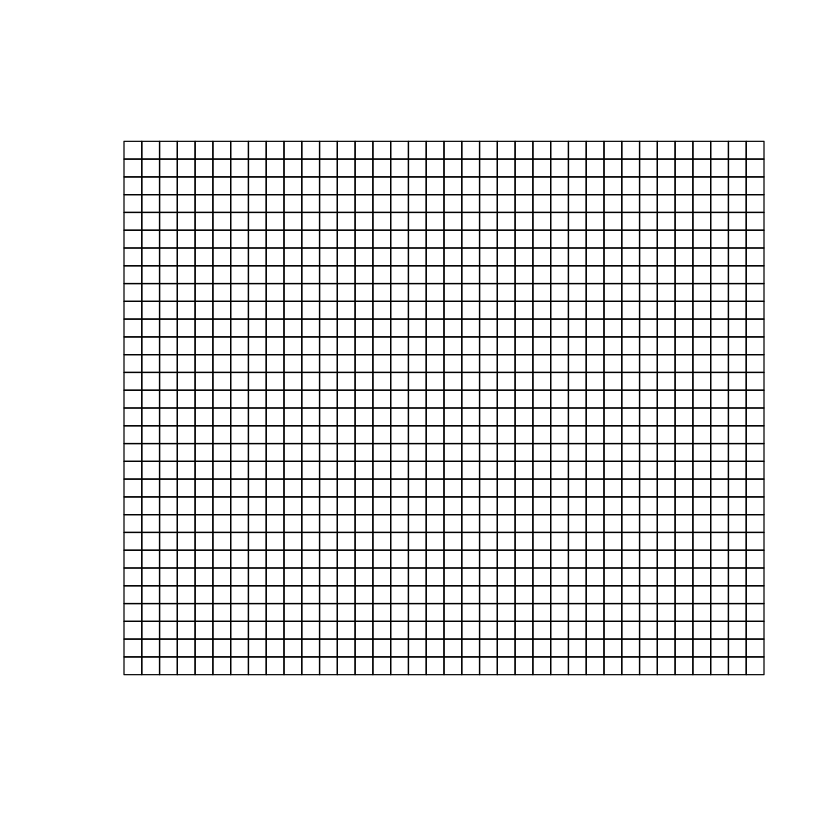

In [39]:
wetlands_fishnet_gpkg %>% plot

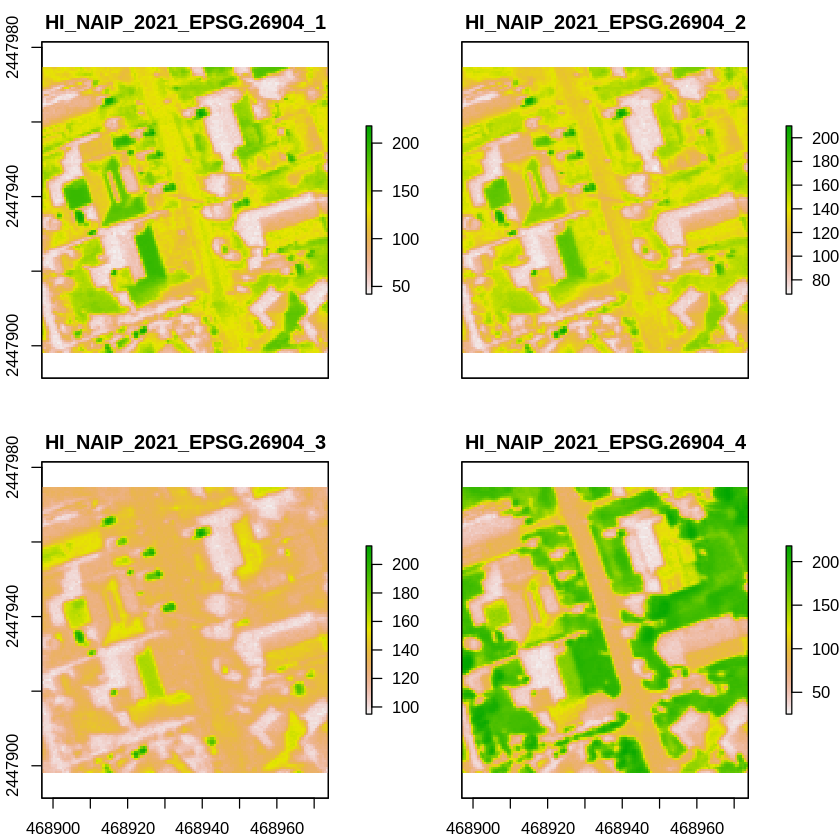

In [42]:
wetlands_fishnet_sample <- wetlands_fishnet_gpkg[200,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(wetlands_sample,.)%>% plot

class      : RasterBrick 
dimensions : 128, 128, 16384, 4  (nrow, ncol, ncell, nlayers)
resolution : 0.6, 0.6  (x, y)
extent     : 468897, 468973.8, 2447514, 2447591  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
source     : memory
names      : HI_NAIP_2021_EPSG.26904_1, HI_NAIP_2021_EPSG.26904_2, HI_NAIP_2021_EPSG.26904_3, HI_NAIP_2021_EPSG.26904_4 
min values :                        39,                        66,                        94,                        27 
max values :                       171,                       170,                       171,                       202 


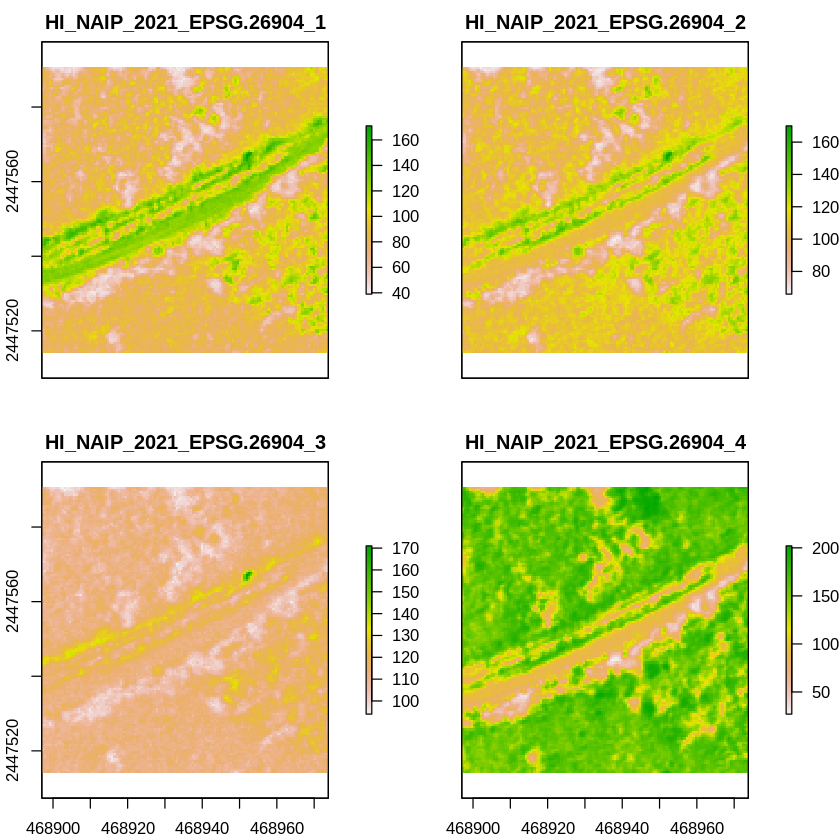

In [45]:
sample_chip <- wetlands_fishnet_gpkg[20,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(wetlands_sample,.)
sample_chip
sample_chip%>% plot

In [48]:
nwi_gpkg$wetland_ty %>% table

.
   Estuarine and Marine Deepwater      Estuarine and Marine Wetland 
                              450                              2107 
      Freshwater Emergent Wetland Freshwater Forested/Shrub Wetland 
                             2461                              1638 
                  Freshwater Pond                              Lake 
                             1954                                81 
                         Riverine 
                             4864 

In [31]:
1:nrow(wetlands_gpkg) %>%
  lapply(function(y){
wetlands_sample <- wetlands_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(hawaii_naip,.)
dem_loc_gpkg <- dem_gpkg %>% st_as_sf %>% st_transform(st_crs(wetlands_gpkg[y,])) %>% st_intersection(wetlands_gpkg[y,])
dem_load_tif <- dem_loc_gpkg$path %>% raster %>% crop(., wetlands_fishnnet_gpkg[y,] %>% st_transform(st_crs(dem_load_tif)))
ccap_loc_gpkg <- ccap_gpkg %>% st_as_sf %>% st_transform(st_crs(wetlands_gpkg[y,])) %>% st_intersection(wetlands_gpkg[y,])
ccap_load_tif <- ccap_loc_gpkg$path %>% raster %>% crop(., wetlands_fishnnet_gpkg[y,] %>% st_transform(st_crs(ccap_load_tif)))
nlcd_load_tif <- nlcd_tif %>% crop(., wetlands_fishnnet_gpkg[y,] %>% st_transform(st_crs(nlcd_tif)))
wetlands_fishnnet_gpkg <- wetlands_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% st_make_grid(cellsize =c(76.8,76.8)) %>% st_as_sf
st_write(wetlands_fishnnet_gpkg,paste0('/content/output_fishnets/',wetlands_gpkg$layer[y],'.gpkg'),delete_dsn=T,delete_layer = T)
  })

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


ERROR: Error in .local(x, y, ...): Cannot get an Extent object from argument y


In [29]:
1:nrow(wetlands_gpkg) %>%
  lapply(function(y){
wetlands_sample <- wetlands_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(hawaii_naip,.)
dem_loc_gpkg <- dem_gpkg %>% st_as_sf %>% st_transform(st_crs(wetlands_gpkg[y,])) %>% st_intersection(wetlands_gpkg[y,])
dem_load_tif <- dem_loc_gpkg$path %>% raster %>% crop(., wetlands_fishnnet_gpkg[y,] %>% st_transform(st_crs(dem_load_tif)))
ccap_loc_gpkg <- ccap_gpkg %>% st_as_sf %>% st_transform(st_crs(wetlands_gpkg[y,])) %>% st_intersection(wetlands_gpkg[y,])
ccap_load_tif <- ccap_loc_gpkg$path %>% raster %>% crop(., wetlands_fishnnet_gpkg[y,] %>% st_transform(st_crs(ccap_load_tif)))
nlcd_load_tif <- nlcd_tif %>% crop(., wetlands_fishnnet_gpkg[y,] %>% st_transform(st_crs(nlcd_tif)))
wetlands_fishnnet_gpkg <- wetlands_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% st_make_grid(cellsize =c(76.8,76.8)) %>% st_as_sf
# file.remove(paste0('/content/output_fishnets/',wetlands_sample$layer[1],'.gpkg'))
st_write(wetlands_fishnnet_gpkg,paste0('/content/output_fishnets/',wetlands_gpkg$layer[y],'.gpkg'),delete_dsn=T,delete_layer = T)

cl <- makeCluster(8)
1:nrow(download_index_gpkg) %>%
  parLapply(cl,.,function(x,wetlands_fishnnet_gpkg,hawaii_naip,wetlands_sample,dem_load_tif,ccap_load_tif,nlcd_load_tif,nwi_gpkg){

library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
sample_chip <- wetlands_fishnnet_gpkg[x,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(wetlands_sample,.)
sample_chip$dem <- projectRaster(dem_load_tif, sample_chip, method="ngb")
sample_chip$nlcd <- projectRaster(nlcd_load_tif, sample_chip, method="ngb")
sample_chip$ccap <- projectRaster(ccap_load_tif, sample_chip, method="ngb")
nwi_gpkg$wetland_ty <- nwi_gpkg$wetland_ty %>% as.factor
nwi_gpkg <- nwi_gpkg %>% st_transform(st_crs(sample_chip))
sample_chip$class <- fasterize(
nwi_gpkg,
sample_chip[[1]],
field = 'wetland_ty',
fun = "first")
sample_chip$class_fill <-sample_chip$class
values(sample_chip$class_fill)[is.na(values(sample_chip$class_fill))] <- values(sample_chip$nlcd)[is.na(values(sample_chip$class_fill))]
values(sample_chip$class_fill)[is.na(values(sample_chip$class_fill))] <- 0
values(sample_chip$dem)[is.na(values(sample_chip$dem))] <- 0
values(sample_chip$ccap)[is.na(values(sample_chip$ccap))] <- 0
values(sample_chip$nlcd)[is.na(values(sample_chip$nlcd))] <- 0
values(sample_chip$class)[is.na(values(sample_chip$class))] <- 0
sample_chip  %>% writeRaster(paste0('output_chips/',(sample_chip %>% extent %>% round)[1],'_',(sample_chip %>% extent %>% round)[3],'.tif'),overwrite=T)

  },wetlands_fishnnet_gpkg,hawaii_naip,wetlands_sample,dem_load_tif,ccap_load_tif,nlcd_load_tif,nwi_gpkg)
stopCluster(cl)
  })

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


ERROR: Error in .local(x, y, ...): Cannot get an Extent object from argument y


In [ ]:
# Iterate over each row index of the 'wetland_aoi_gpkg' dataset
1:nrow(wetland_aoi_gpkg) %>% lapply(function(y){

# Select the wetland polygon of interest for the current row index,
# transform its CRS to match that of 'hawaii_naip'
# crop the 'hawaii_naip' raster dataset to the wetland polygon
# wetland_polygon /was/ wetlands_sample
wetland_polygon <- wetland_aoi_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(hawaii_naip,.)

# DEM ----------------------------------------------------------------------------------------------------------------
# Extract elevation data within the extent of the current wetland polygon,
# transform its CRS to match that of the wetland polygon, and calculate the intersection with the wetland polygon
# dem_location_gpkg /was/ dem_loc_gpkg  dem_gpkg
dem_location_gpkg <- dem_gpkg %>% st_as_sf %>% st_transform(st_crs(wetland_aoi_gpkg[y,])) %>% st_intersection(wetland_aoi_gpkg[y,])

# Crop the elevation data raster to the extent of the intersected wetland polygon
# dem_load_tif
# wetland_aoi_fishnet_gpkg /was/ wetlands_fishnnet_gpkg
dem_load_tif <- dem_location_gpkg$path %>% raster %>% crop(., wetland_aoi_fishnet_gpkg[y,] %>% st_transform(st_crs(dem_load_tif)))

# CCAP ----------------------------------------------------------------------------------------------------------------
# Extract ccap data within the extent of the current wetland polygon,
# transform its CRS to match that of the wetland polygon, and calculate the intersection with the wetland polygon
# dem_location_gpkg /was/ dem_loc_gpkg
# ccap_gpkg
# dem_location_gpkg
ccap_location_gpkg <- ccap_gpkg %>% st_as_sf %>% st_transform(st_crs(wetland_aoi_gpkg[y,])) %>% st_intersection(wetland_aoi_gpkg[y,])

# Crop the ccap data raster to the extent of the intersected wetland polygon
# ccap_load_tif
# wetland_aoi_fishnet_gpkg /was/ wetlands_fishnnet_gpkg
ccap_load_tif <- ccap_location_gpkg$path %>% raster %>% crop(., wetland_aoi_fishnet_gpkg[y,] %>% st_transform(st_crs(ccap_load_tif)))


# NLCD ----------------------------------------------------------------------------------------------------------------
# Crop the NLCD raster dataset to the extent of the intersected wetland polygon
nlcd_load_tif <- nlcd_tif %>% crop(., wetland_aoi_fishnet_gpkg[y,] %>% st_transform(st_crs(nlcd_tif)))


# Transform the wetland polygon to match the CRS of 'hawaii_naip',
# create a grid of fishnet cells with a specified cell size, and convert it to an sf object
# change cell size
wetland_aoi_fishnet_gpkg <- wetland_aoi_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% st_make_grid(cellsize =c(76.8,76.8)) %>% st_as_sf

# file.remove(paste0('/content/output_fishnets/',wetland_polygon$layer[1],'.gpkg'))

# Write the fishnet grid to a GeoPackage file in the 'output_fishnets' directory,
# with the filename based on the layer name from 'wetland_aoi_gpkg'
st_write(wetland_aoi_fishnet_gpkg,paste0('/content/output_fishnets/',wetland_aoi_gpkg$layer[y],'.gpkg'),delete_dsn=T,delete_layer = T)
  })

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


ERROR: Error in .local(x, y, ...): Cannot get an Extent object from argument y


In [ ]:
# Iterate over each row index of the 'wetland_aoi_gpkg' dataset
1:nrow(wetland_aoi_gpkg) %>%
  lapply(function(y){

# Select the wetland polygon of interest for the current row index,
# transform its CRS to match that of 'hawaii_naip'
# crop the 'hawaii_naip' raster dataset to the wetland polygon
wetland_polygon <- wetland_aoi_gpkg[y,] %>% # wetland_polygon /was/ wetlands_sample
  st_transform(st_crs(hawaii_naip)) %>%
    crop(hawaii_naip,.)

# DEM ----------------------------------------------------------------------------------------------------------------
# Extract elevation data within the extent of the current wetland polygon,
# transform its CRS to match that of the wetland polygon, and calculate the intersection with the wetland polygon
dem_location_gpkg <- dem_gpkg %>% # dem_location_gpkg /was/ dem_loc_gpkg  dem_gpkg
  st_as_sf %>%
  st_transform(st_crs(wetland_aoi_gpkg[y,])) %>%
  st_intersection(wetland_aoi_gpkg[y,])

# Crop the elevation data raster to the extent of the intersected wetland polygon
dem_load_tif <- dem_location_gpkg$path %>%  # dem_load_tif
  raster %>%
    crop(., wetland_aoi_fishnet_gpkg[y,] %>% st_transform(st_crs(dem_load_tif))) # wetland_aoi_fishnet_gpkg /was/ wetlands_fishnnet_gpkg

# CCAP ----------------------------------------------------------------------------------------------------------------
# Extract ccap data within the extent of the current wetland polygon,
# transform its CRS to match that of the wetland polygon, and calculate the intersection with the wetland polygon
ccap_location_gpkg <- ccap_gpkg %>% # dem_location_gpkg /was/ dem_loc_gpkg      ccap_gpkg dem_location_gpkg
  st_as_sf %>%
  st_transform(st_crs(wetland_aoi_gpkg[y,])) %>%
  st_intersection(wetland_aoi_gpkg[y,])

# Crop the ccap data raster to the extent of the intersected wetland polygon
ccap_load_tif <- ccap_location_gpkg$path %>%  # ccap_load_tif
  raster %>%
    crop(., wetland_aoi_fishnet_gpkg[y,] %>% st_transform(st_crs(ccap_load_tif))) # wetland_aoi_fishnet_gpkg /was/ wetlands_fishnnet_gpkg


# NLCD ----------------------------------------------------------------------------------------------------------------
# Crop the NLCD raster dataset to the extent of the intersected wetland polygon
nlcd_load_tif <- nlcd_tif %>%
  crop(., wetland_aoi_fishnet_gpkg[y,] %>% st_transform(st_crs(nlcd_tif)))


# Transform the wetland polygon to match the CRS of 'hawaii_naip',
# create a grid of fishnet cells with a specified cell size, and convert it to an sf object
wetland_aoi_fishnet_gpkg <- wetland_aoi_gpkg[y,] %>%
  st_transform(st_crs(hawaii_naip)) %>%
    st_make_grid(cellsize =c(76.8,76.8)) %>% # change cell size
      st_as_sf

# file.remove(paste0('/content/output_fishnets/',wetland_polygon$layer[1],'.gpkg'))

# Write the fishnet grid to a GeoPackage file in the 'output_fishnets' directory,
# with the filename based on the layer name from 'wetland_aoi_gpkg'
st_write(wetland_aoi_fishnet_gpkg,paste0('/content/output_fishnets/',wetland_aoi_gpkg$layer[y],'.gpkg'),delete_dsn=T,delete_layer = T)

cl <- makeCluster(8)
1:nrow(download_index_gpkg) %>%
  parLapply(cl,.,function(x,wetland_aoi_fishnet_gpkg,hawaii_naip,wetland_polygon,dem_load_tif,ccap_load_tif,nlcd_load_tif,nwi_gpkg){

library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)

# Define a sample chip by transforming the wetland polygon to match the CRS of 'hawaii_naip',
# and crop it to the extent of the wetland sample
sample_chip <- wetland_aoi_fishnet_gpkg[x,] %>%
  st_transform(st_crs(hawaii_naip)) %>%
    crop(wetland_polygon,.)

# Project the elevation and NLCD data to match the extent and resolution of the sample chip using nearest neighbor (ngb)
sample_chip$dem <- projectRaster(dem_load_tif, sample_chip, method="ngb")
sample_chip$ccap <- projectRaster(ccap_load_tif, sample_chip, method="ngb")
sample_chip$nlcd <- projectRaster(nlcd_load_tif, sample_chip, method="ngb")


# Convert the 'wetland_ty' column in 'nwi_gpkg' to a factor and transform its CRS to match the sample chip
nwi_gpkg$wetland_ty <- nwi_gpkg$wetland_ty %>% as.factor
nwi_gpkg <- nwi_gpkg %>% st_transform(st_crs(sample_chip))

# Classify wetland types using fasterize and assign the result to the 'class' column of the sample chip
sample_chip$class <- fasterize(
nwi_gpkg,
sample_chip[[1]],
field = 'wetland_ty',
fun = "first")

# Create a 'class_fill' column in the sample chip and fill missing values using NLCD data,
# then set remaining missing values to 0
sample_chip$class_fill <-sample_chip$class
values(sample_chip$class_fill)[is.na(values(sample_chip$class_fill))] <- values(sample_chip$nlcd)[is.na(values(sample_chip$class_fill))]
values(sample_chip$class_fill)[is.na(values(sample_chip$class_fill))] <- 0

# Set NA values in the elevation, NLCD, class, and ccap columns of the sample chip to 0
values(sample_chip$dem)[is.na(values(sample_chip$dem))] <- 0
values(sample_chip$nlcd)[is.na(values(sample_chip$nlcd))] <- 0
values(sample_chip$class)[is.na(values(sample_chip$class))] <- 0
values(sample_chip$ccap)[is.na(values(sample_chip$ccap))] <- 0

# Write the sample chip to a tif file in the 'output_chips' directory
sample_chip  %>% writeRaster(paste0('output_chips/',(sample_chip %>% extent %>% round)[1],'_',(sample_chip %>% extent %>% round)[3],'.tif'),overwrite=T)

  },wetland_aoi_fishnet_gpkg,hawaii_naip,wetland_polygon,dem_load_tif,ccap_load_tif,nlcd_load_tif,nwi_gpkg)
stopCluster(cl)
  })

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


ERROR: Error in .local(x, y, ...): Cannot get an Extent object from argument y


In [ ]:
zip(zipfile = 'testZip', files = 'testDir/test.csv') #make this work

In [ ]:
#put code here to upload to drive

In [85]:
zip(zipfile = "/content/output_fishnets.zip",
    files = c("/content/output_fishnets"))

In [86]:
# save to processed_data https://drive.google.com/drive/folders/1CXLo3IfmEVgOIaKHtpaXiblhBePgl1fS?usp=drive_link
drive_upload(media = "/content/output_fishnets.zip", path = as_id("1CXLo3IfmEVgOIaKHtpaXiblhBePgl1fS"))

Local file:

• /content/output_fishnets.zip

Uploaded into Drive file:

• output_fishnets.zip <id: 1sfNb5gEmjLyNh7-_UdWsvM1Deez7dUPR>

With MIME type:

• application/zip

